# Loan prediction example
Based on [this tutorial](https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/)

### Download and unzip the dataset containing trees, lakes, landscapes and so on.

### Import libraries

In [1]:
import sys
!{sys.executable} -m pip install tensorflow
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install keras
import pandas as pd
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import keras

You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/tommy/dev/datascience/env/bin/python -m pip install --upgrade pip' command.


### Read the label data and inspect the dataset

In [2]:
df=pd.read_csv("./train.csv")
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

### Explore data
We

In [3]:
df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

### frequency distribution of non numeric values

In [4]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

## Income

<AxesSubplot:>

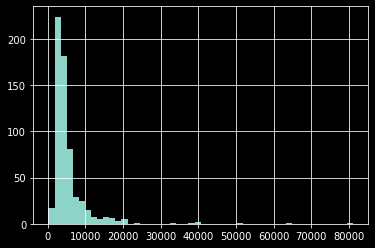

In [5]:
df['ApplicantIncome'].hist(bins=50)

### Box plot
Shows that most lowntakers are lowincome individuals and that we have a lot of outliners in the data

<AxesSubplot:>

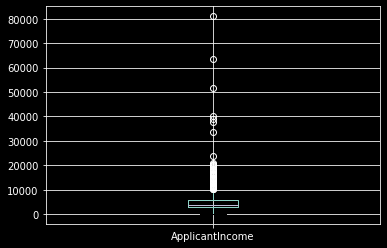

In [6]:
df.boxplot(column='ApplicantIncome')

### Box plots in comparition
Compared the income by a boolean variable.  
Visible that the outliners are in the graduate group and that there is no big difference in the mean of the income of the two education groups.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

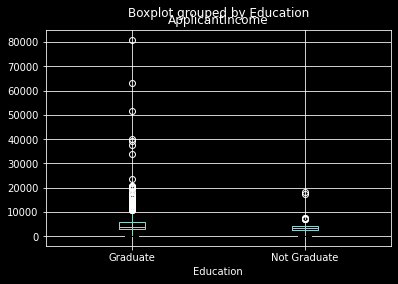

In [7]:
df.boxplot(column='ApplicantIncome', by = 'Education')

## Loan amount

<AxesSubplot:>

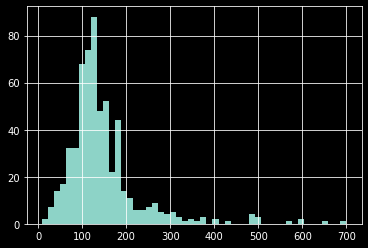

In [8]:
df['LoanAmount'].hist(bins=50)

<AxesSubplot:>

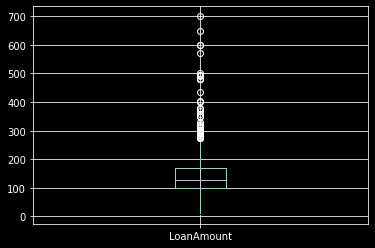

In [9]:
df.boxplot(column='LoanAmount')

Shows a lot of extrem values

## Categorical variable analysis

In [10]:
temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


<AxesSubplot:title={'center':'Applicants by Credit_History'}, xlabel='Credit_History', ylabel='Count of Applicants'>

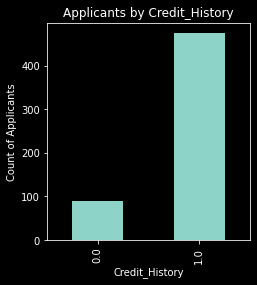

In [11]:
fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar')

Text(0.5, 1.0, 'Probability of getting loan by credit history')

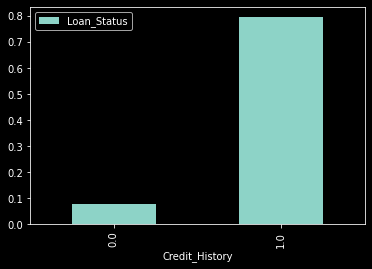

In [12]:
ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history. You can plot similar graphs by Married, Self-Employed, Property_Area, etc.

Text(0.5, 1.0, 'Probability of getting loan by credit history')

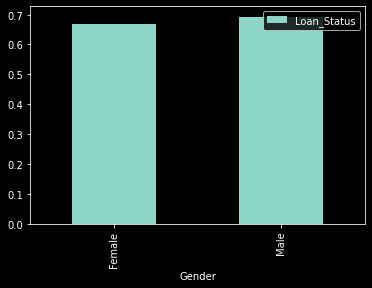

In [13]:
temp3 = df.pivot_table(values='Loan_Status',index=['C'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
ax2 = fig.add_subplot(122)
temp3.plot(kind = 'bar')
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")

Gender shows that they are equal to each other?

<AxesSubplot:xlabel='Credit_History'>

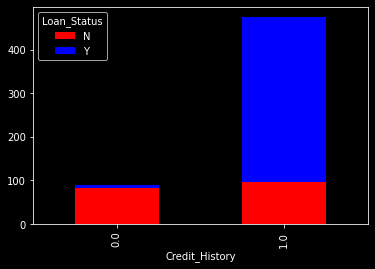

In [15]:
temp2 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp2.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)